# 사전 학습된 CNN

In [1]:
import keras
import numpy as np
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras import optimizers
%matplotlib inline


#https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt   

Using TensorFlow backend.


In [2]:
#True는 Full Network 신경망 부분까지 모두 포함, False는 신경망 부분 제외하고 CNN 부분만 적용, False로 하면 속도는 확실히 빠르다.
#default 값은 True

#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet', include_top = 1)


#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet', include_top = 1)


#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet', include_top = 1)
 
#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet', include_top = 1)  

Instructions for updating:
If using Keras pass *_constraint arguments to layers.




In [3]:
vgg_model.summary()    # 138,357,544
#inception_model.summary() # 23,851,784
#resnet_model.summary()  # 25,636,712
#mobilenet_model.summary() # 4,253,864

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

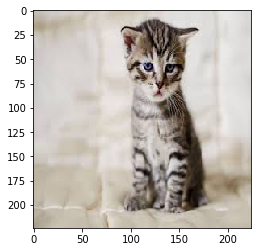

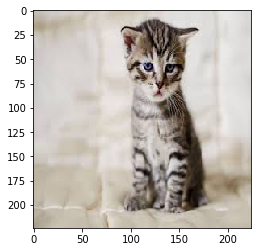

image batch size (1, 224, 224, 3)


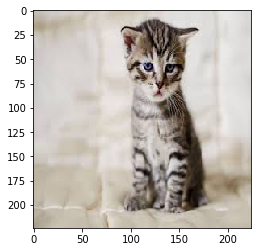

In [4]:
filename = 'cat.jpg'
original = load_img(filename, target_size=(224, 224)) #이미지를 224*224로 바꾸어서로딩, 원래 이미지는 몇*몇인지 모름
plt.imshow(original)
plt.show()

numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()

image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0])) #float은 0~1값 uint8로 할때는 0~255 사이값

In [5]:
processed_image = vgg16.preprocess_input(image_batch.copy()) #위에서 읽은것을 전처리과정하기, 복사값을 준다.
print(processed_image.shape)
print(processed_image.dtype)
print(processed_image[0])

(1, 224, 224, 3)
float32
[[[ 79.061     75.221     72.32    ]
  [ 79.061     75.221     72.32    ]
  [ 79.061     75.221     72.32    ]
  ...
  [110.061     99.221     92.32    ]
  [110.061     99.221     92.32    ]
  [111.061    100.221     93.32    ]]

 [[ 78.061     74.221     71.32    ]
  [ 78.061     74.221     71.32    ]
  [ 78.061     74.221     71.32    ]
  ...
  [110.061     99.221     92.32    ]
  [110.061     99.221     92.32    ]
  [111.061    100.221     93.32    ]]

 [[ 75.061     71.221     68.32    ]
  [ 76.061     72.221     69.32    ]
  [ 76.061     72.221     69.32    ]
  ...
  [110.061     99.221     92.32    ]
  [110.061     99.221     92.32    ]
  [111.061    100.221     93.32    ]]

 ...

 [[ 36.060997  40.221     42.32    ]
  [ 36.060997  40.221     42.32    ]
  [ 37.060997  41.221     43.32    ]
  ...
  [ 67.061     70.221     70.32    ]
  [ 67.061     70.221     70.32    ]
  [ 67.061     70.221     70.32    ]]

 [[ 35.060997  39.221     41.32    ]
  [ 36.06099

In [6]:
predictions = vgg_model.predict(processed_image) #마지막 레이어값까지 통과
print(predictions.shape)

label_vgg = decode_predictions(predictions, top=3) #제일 확률이 높은 10개를 출력
print(label_vgg)


(1, 1000)
[[('n02124075', 'Egyptian_cat', 0.6198524), ('n02123045', 'tabby', 0.2104058), ('n02123159', 'tiger_cat', 0.11506198)]]


In [7]:
processed_image = resnet50.preprocess_input(image_batch.copy())
predictions = resnet_model.predict(processed_image)
label_resnet = decode_predictions(predictions, top=3)
label_resnet

[[('n02124075', 'Egyptian_cat', 0.5038419),
  ('n02123045', 'tabby', 0.29257292),
  ('n02123159', 'tiger_cat', 0.10698989)]]

In [8]:
processed_image = mobilenet.preprocess_input(image_batch.copy())
predictions = mobilenet_model.predict(processed_image)
label_mobilenet = decode_predictions(predictions)
label_mobilenet

[[('n02124075', 'Egyptian_cat', 0.85410625),
  ('n02123045', 'tabby', 0.0819757),
  ('n02123159', 'tiger_cat', 0.040218253),
  ('n02127052', 'lynx', 0.0053246063),
  ('n02129604', 'tiger', 0.0042678174)]]

In [9]:
filename = 'cat.jpg'
original = load_img(filename, target_size=(299, 299))
numpy_image = img_to_array(original)
image_batch = np.expand_dims(numpy_image, axis=0)

processed_image = inception_v3.preprocess_input(image_batch.copy())
predictions = inception_model.predict(processed_image)
label_inception = decode_predictions(predictions)
label_inception

[[('n02123045', 'tabby', 0.61685455),
  ('n02124075', 'Egyptian_cat', 0.28502658),
  ('n02123159', 'tiger_cat', 0.07458408),
  ('n04589890', 'window_screen', 0.0009119827),
  ('n02127052', 'lynx', 0.0005514779)]]

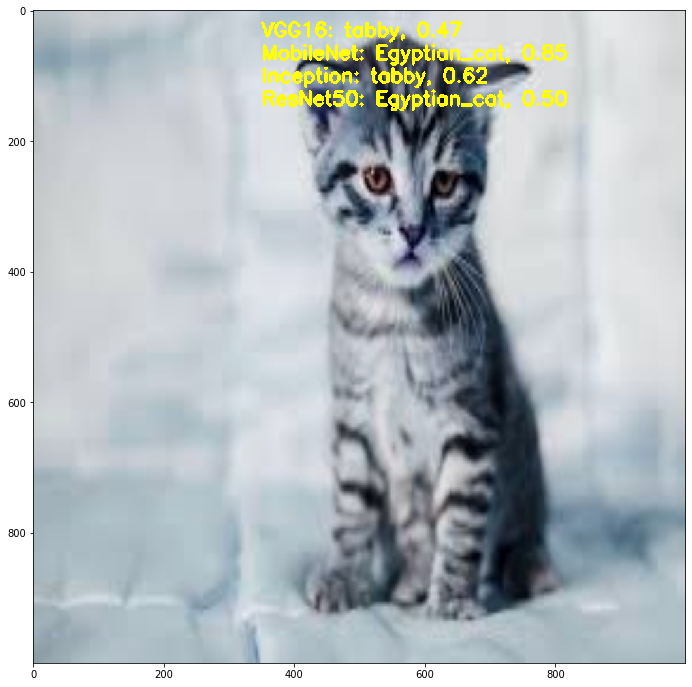

In [46]:
#동일 이미지에 대해서, 4개의 CNN 모델을 적용한 결과보기
#detection 위치 포착
#segmentation 외곽선까지 검출

import cv2
img = cv2.imread("cat.jpg")
img = cv2.resize(img, (1000,1000))
cv2.putText(img, "VGG16: {}, {:.2f}".format(label_vgg[0][0][1], label_vgg[0][0][2]) , (350, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 3)
cv2.putText(img, "MobileNet: {}, {:.2f}".format(label_mobilenet[0][0][1], label_mobilenet[0][0][2]) , (350, 75), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 3)
cv2.putText(img, "Inception: {}, {:.2f}".format(label_inception[0][0][1], label_inception[0][0][2]) , (350, 110), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 3)
cv2.putText(img, "ResNet50: {}, {:.2f}".format(label_resnet[0][0][1], label_resnet[0][0][2]) , (350, 145), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 3)
cv2.imwrite("out.jpg", img)
plt.figure(figsize = (12, 12))
plt.imshow(img)
plt.show()

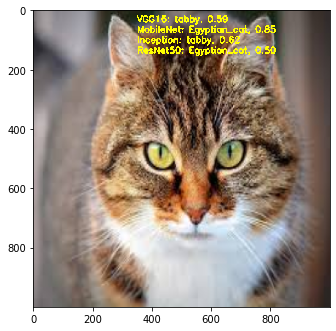

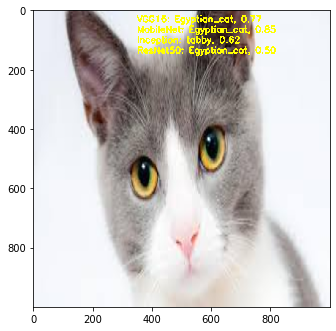

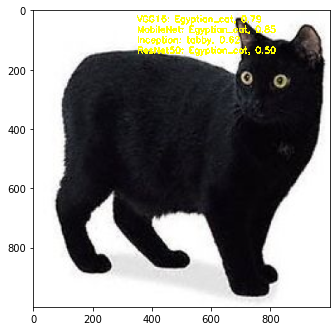

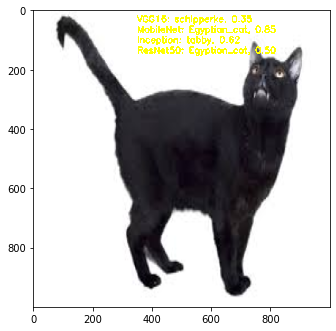

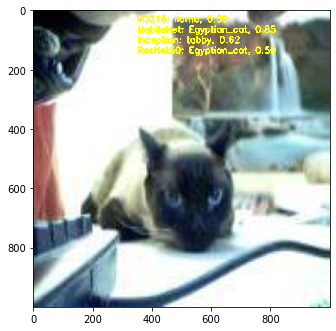

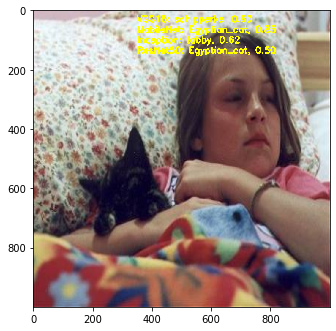

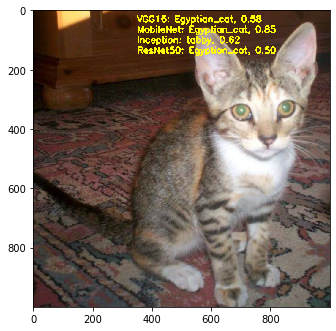

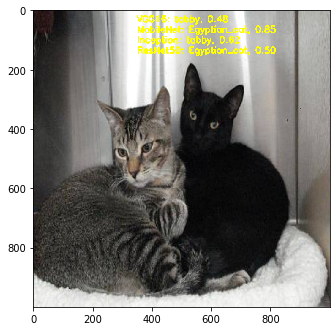

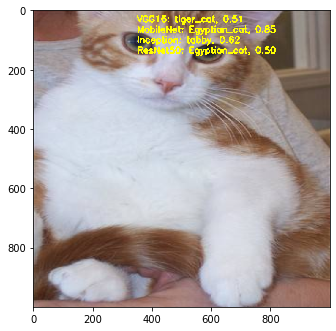

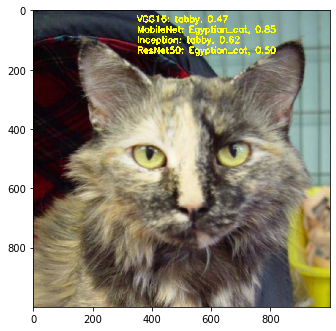

In [74]:
#폴더 내에 있는 모든 사진에 대해 일반화
X = np.zeros((15*3, 24,24))
img = []
num = [i+1 for i in range(10)]
result = []

import cv2

for i in range(10):
    filename = "C:/Users/student/Desktop/image/cat/cat{0}.jpg".format(num[i])
    original = load_img(filename, target_size=(224, 224)) #이미지를 224*224로 바꾸어서로딩, 원래 이미지는 몇*몇인지 모름
    #plt.imshow(original)
    #plt.show()

    numpy_image = img_to_array(original)
    #plt.imshow(np.uint8(numpy_image))
    #plt.show()

    image_batch = np.expand_dims(numpy_image, axis=0)
   # print('image batch size', image_batch.shape)
   # plt.imshow(np.uint8(image_batch[0])) #float은 0~1값 uint8로 할때는 0~255 사이값
    
    processed_image = vgg16.preprocess_input(image_batch.copy()) #위에서 읽은것을 전처리과정하기, 복사값을 준다.
   # print(processed_image.shape)
   # print(processed_image.dtype)
   # print(processed_image[0])
    
    predictions = vgg_model.predict(processed_image) #마지막 레이어값까지 통과
   # print(predictions.shape)

    label_vgg = decode_predictions(predictions, top=3) #제일 확률이 높은 10개를 출력
   # print(label_vgg)


    img = cv2.imread("C:/Users/student/Desktop/image/cat/cat{0}.jpg".format(num[i]))
    img = cv2.resize(img, (1000,1000))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    cv2.putText(img, "VGG16: {}, {:.2f}".format(label_vgg[0][0][1], label_vgg[0][0][2]) , (350, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 3)
    cv2.putText(img, "MobileNet: {}, {:.2f}".format(label_mobilenet[0][0][1], label_mobilenet[0][0][2]) , (350, 75), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 3)
    cv2.putText(img, "Inception: {}, {:.2f}".format(label_inception[0][0][1], label_inception[0][0][2]) , (350, 110), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 3)
    cv2.putText(img, "ResNet50: {}, {:.2f}".format(label_resnet[0][0][1], label_resnet[0][0][2]) , (350, 145), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 3)
    cv2.imwrite("C:/Users/student/Desktop/image/output/cat{0}.jpg".format(num[i]), img)
    result.append(img)
    plt.figure(figsize = (12, 12))

    plt.subplot(211)
    plt.imshow(img)
    plt.show()

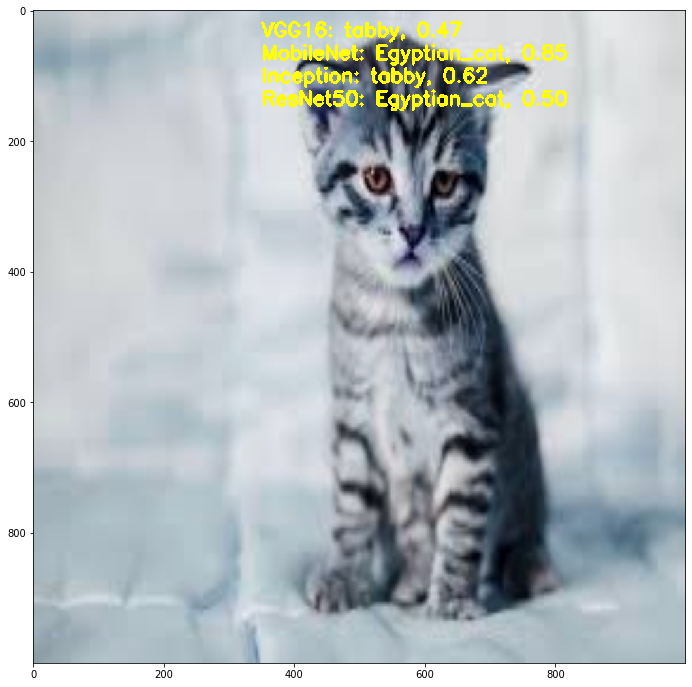